In [1]:
# 📦 Step 1: 导入必要库
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# 用于统计
from collections import Counter
import numpy as np

# 设置绘图风格
sns.set(style="whitegrid")


In [3]:
# 📂 Step 2: 构建有向加权图

graph_file = 'weibo_graph.txt'
G = nx.DiGraph()

with open(graph_file, 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) != 2:
            continue
        source, targets = parts
        for t in targets.split():
            user_id, weight = t.split(':')
            G.add_edge(source, user_id, weight=float(weight))

print(f"✅ 图构建完成：节点数 = {G.number_of_nodes()}，边数 = {G.number_of_edges()}")


✅ 图构建完成：节点数 = 20492，边数 = 147577


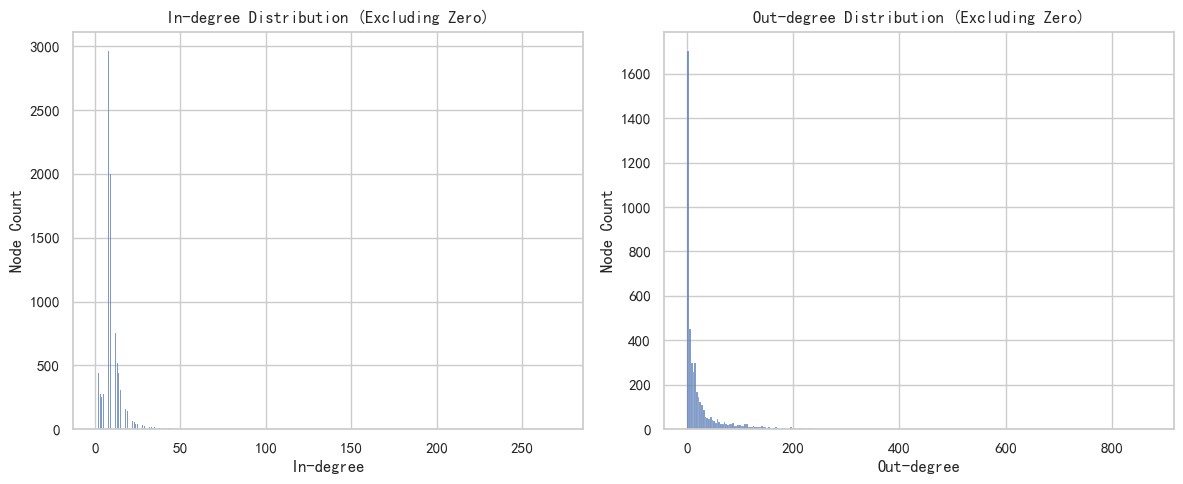

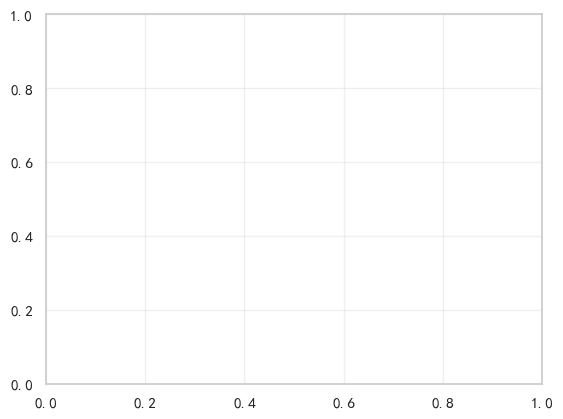

In [ ]:
# 📊 Step 3: 节点的入度和出度分布

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 设置中文支持
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
in_degrees = [d for n, d in G.in_degree() if d > 0]
out_degrees = [d for n, d in G.out_degree() if d > 0]


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(in_degrees)
plt.title("In-degree Distribution (Excluding Zero)")
plt.xlabel("In-degree")
plt.ylabel("Node Count")

plt.subplot(1, 2, 2)
sns.histplot(out_degrees)
plt.title("Out-degree Distribution (Excluding Zero)")
plt.xlabel("Out-degree")
plt.ylabel("Node Count")

plt.tight_layout()  # 自动调整子图间距
plt.show()
plt.subplots_adjust(wspace=0.3)  # 调整子图水平间距
plt.grid(True, alpha=0.3)        # 添加透明网格线



In [18]:
# 🧮 Step 4: 图的密度

density = nx.density(G)
print(f"📏 图的密度（Density）：{density:.6f}")

📏 图的密度（Density）：0.000351


In [64]:
# 🔗 Step 5: 连通分量分析
# Translate print statements
print(f"🔍 Number of weakly connected components: {len(weak_components)}")
print(f"🌐 Size of the largest weakly connected component: {len(largest_weak)}")
print(f"🔍 Number of strongly connected components: {len(strong_components)}")
print(f"💠 Size of the largest strongly connected component: {len(largest_strong)}")

🔍 Number of weakly connected components: 482
🌐 Size of the largest weakly connected component: 19473
🔍 Number of strongly connected components: 20492
💠 Size of the largest strongly connected component: 1


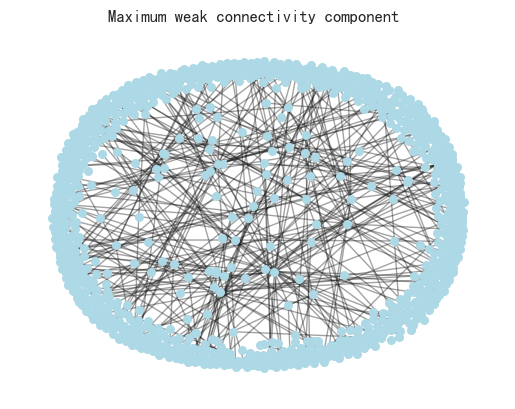

In [65]:
import random
sample_nodes = random.sample(list(H.nodes()), k=min(len(H.nodes()), 1000))
H_sub = H.subgraph(sample_nodes).copy()

pos = nx.spring_layout(H_sub, seed=42)
nx.draw_networkx_nodes(H_sub, pos, node_size=30, node_color='lightblue')
nx.draw_networkx_edges(H_sub, pos, alpha=0.4, arrows=False)
plt.title("Maximum weak connectivity component ")
plt.axis('off')
plt.show()



In [26]:
# PageRank 分析（考虑边权重）
pagerank = nx.pagerank(G, weight='weight')

# 输出前10个节点的 PageRank 值
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by PageRank:")
for node, rank in top_pagerank:
    print(f"Node: {node}, PageRank: {rank}")


Top 10 nodes by PageRank:
Node: 1642512402, PageRank: 0.003658182919454185
Node: 1784473157, PageRank: 0.003568985740542641
Node: 2084348103, PageRank: 0.002522431937513953
Node: 2656274875, PageRank: 0.001994831949052783
Node: 5291032498, PageRank: 0.0018920257192265337
Node: 1618051664, PageRank: 0.0015907205615160087
Node: 1974808274, PageRank: 0.0011350385042935517
Node: 1130677950, PageRank: 0.0010891479456123815
Node: 2482557597, PageRank: 0.0008306120020432576
Node: 1850988623, PageRank: 0.0007951416928022385


In [27]:
# 计算度中心性
degree_centrality = nx.degree_centrality(G)

# 输出前10个节点的度中心性
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Degree Centrality:")
for node, centrality in top_degree_centrality:
    print(f"Node: {node}, Degree Centrality: {centrality}")


Top 10 nodes by Degree Centrality:
Node: 3538021837991992, Degree Centrality: 0.04260407007954712
Node: 3570716009678220, Degree Centrality: 0.04236006051437216
Node: 3918798316397729, Degree Centrality: 0.041384022253672346
Node: 3608356143065421, Degree Centrality: 0.03650383095017325
Node: 3551685860964318, Degree Centrality: 0.036064613732858325
Node: 3602801513263583, Degree Centrality: 0.03538138695036845
Node: 3631073731086816, Degree Centrality: 0.03528378312429847
Node: 3534827825299244, Degree Centrality: 0.03279488555951393
Node: 3501712684038955, Degree Centrality: 0.03181884729881412
Node: 3515863422717161, Degree Centrality: 0.030794007125079303


In [36]:
# # 获取出度最大的前100个节点
# top_nodes = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:1000]
# top_node_ids = [node for node, _ in top_nodes]

# # 提取子图
# subgraph = G.subgraph(top_node_ids)

# # 在子图上计算介数中心性
# betweenness_sub = nx.betweenness_centrality(subgraph, weight='weight')

# # 输出结果
# print("子图中 Top 10 节点的介数中心性：")
# for node, centrality in sorted(betweenness_sub.items(), key=lambda x: x[1], reverse=True)[:10]:
#     print(f"Node: {node}, Betweenness Centrality: {centrality}")
print("子图是否为弱连通图：", nx.is_weakly_connected(subgraph))
print("子图弱连通分量数量：", nx.number_weakly_connected_components(subgraph))



子图是否为弱连通图： False
子图弱连通分量数量： 1000


In [30]:
# 计算特征向量中心性
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')

# 输出前10个节点的特征向量中心性
top_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Eigenvector Centrality:")
for node, centrality in top_eigenvector_centrality:
    print(f"Node: {node}, Eigenvector Centrality: {centrality}")


Top 10 nodes by Eigenvector Centrality:
Node: 2656274875, Eigenvector Centrality: 0.5435630440891525
Node: 1784473157, Eigenvector Centrality: 0.4526221936404964
Node: 1642512402, Eigenvector Centrality: 0.39892017623143156
Node: 1618051664, Eigenvector Centrality: 0.3865510229409418
Node: 2084348103, Eigenvector Centrality: 0.17510901304304868
Node: 1974808274, Eigenvector Centrality: 0.13078820266909222
Node: 5291032498, Eigenvector Centrality: 0.12635626922178084
Node: 2482557597, Eigenvector Centrality: 0.09533273509060193
Node: 1974576991, Eigenvector Centrality: 0.08203693474866812
Node: 1850988623, Eigenvector Centrality: 0.07993802714924363


               Node  Betweenness Centrality
0  3919231177222509                     0.0
1  3910937398317542                     0.0
2  3911542460109677                     0.0
3  3911360435486623                     0.0
4  3632667465734419                     0.0
5  3600427322813770                     0.0
6  3909717648307271                     0.0
7  3644236978724465                     0.0
8  3918187604984663                     0.0
9  3628529369513105                     0.0


C:\Users\86185\AppData\Local\Temp\ipykernel_1616\3511498610.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pagerank, x='PageRank', y='Node', ax=axes[0], palette='Blues_r')
C:\Users\86185\AppData\Local\Temp\ipykernel_1616\3511498610.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_degree, x='Degree Centrality', y='Node', ax=axes[1], palette='Greens_r')
C:\Users\86185\AppData\Local\Temp\ipykernel_1616\3511498610.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eigenvector, x='Eigenvector Centrality', y='No

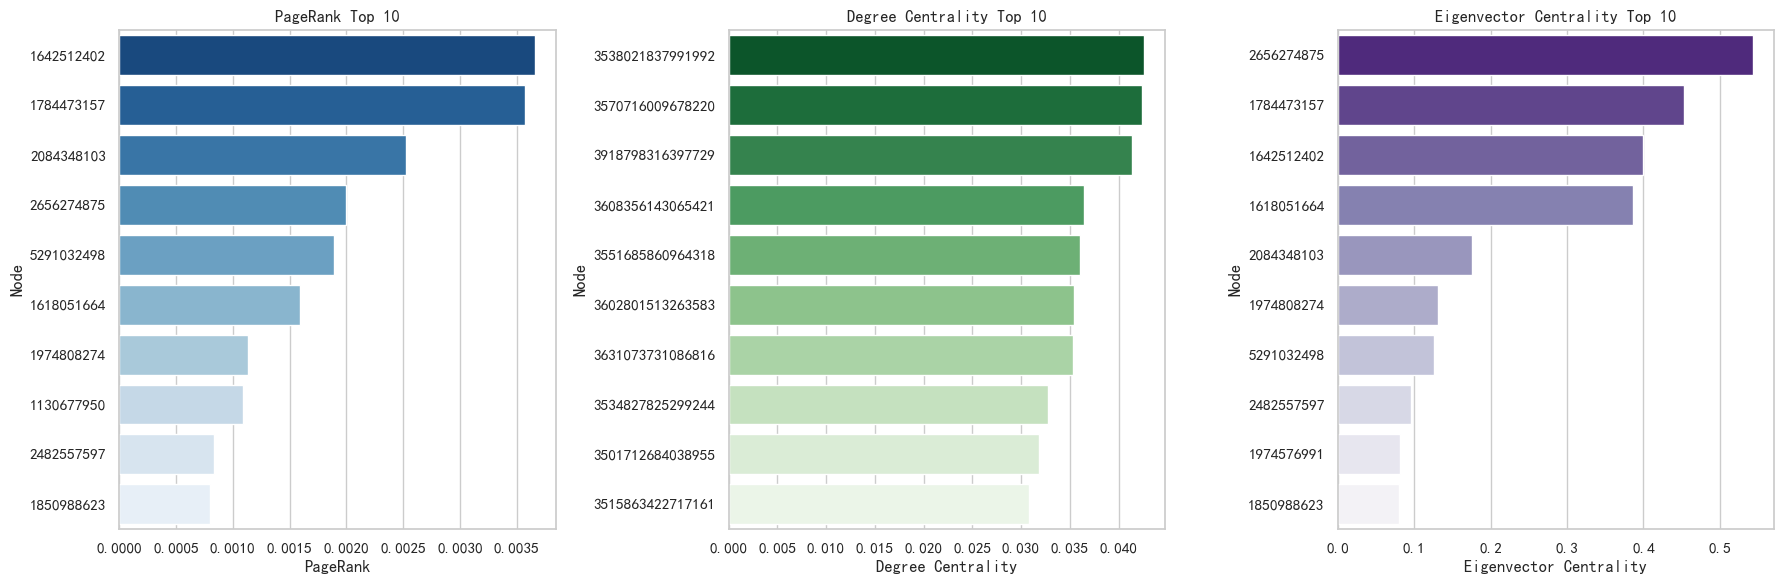

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 准备中心性数据
def top10_to_df(centrality_dict, name):
    return pd.DataFrame(
        sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10],
        columns=['Node', name]
    )

df_pagerank = top10_to_df(pagerank, 'PageRank')
df_degree = top10_to_df(degree_centrality, 'Degree Centrality')
df_betweenness = top10_to_df(betweenness_sub, 'Betweenness Centrality')
df_eigenvector = top10_to_df(eigenvector_centrality, 'Eigenvector Centrality')
print(df_betweenness)
# 设置中文字体（防止乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df_pagerank, x='PageRank', y='Node', ax=axes[0], palette='Blues_r')
axes[0].set_title("PageRank Top 10")

sns.barplot(data=df_degree, x='Degree Centrality', y='Node', ax=axes[1], palette='Greens_r')
axes[1].set_title("Degree Centrality Top 10")

sns.barplot(data=df_eigenvector, x='Eigenvector Centrality', y='Node', ax=axes[2], palette='Purples_r')
axes[2].set_title("Eigenvector Centrality Top 10")

plt.tight_layout()
plt.show()




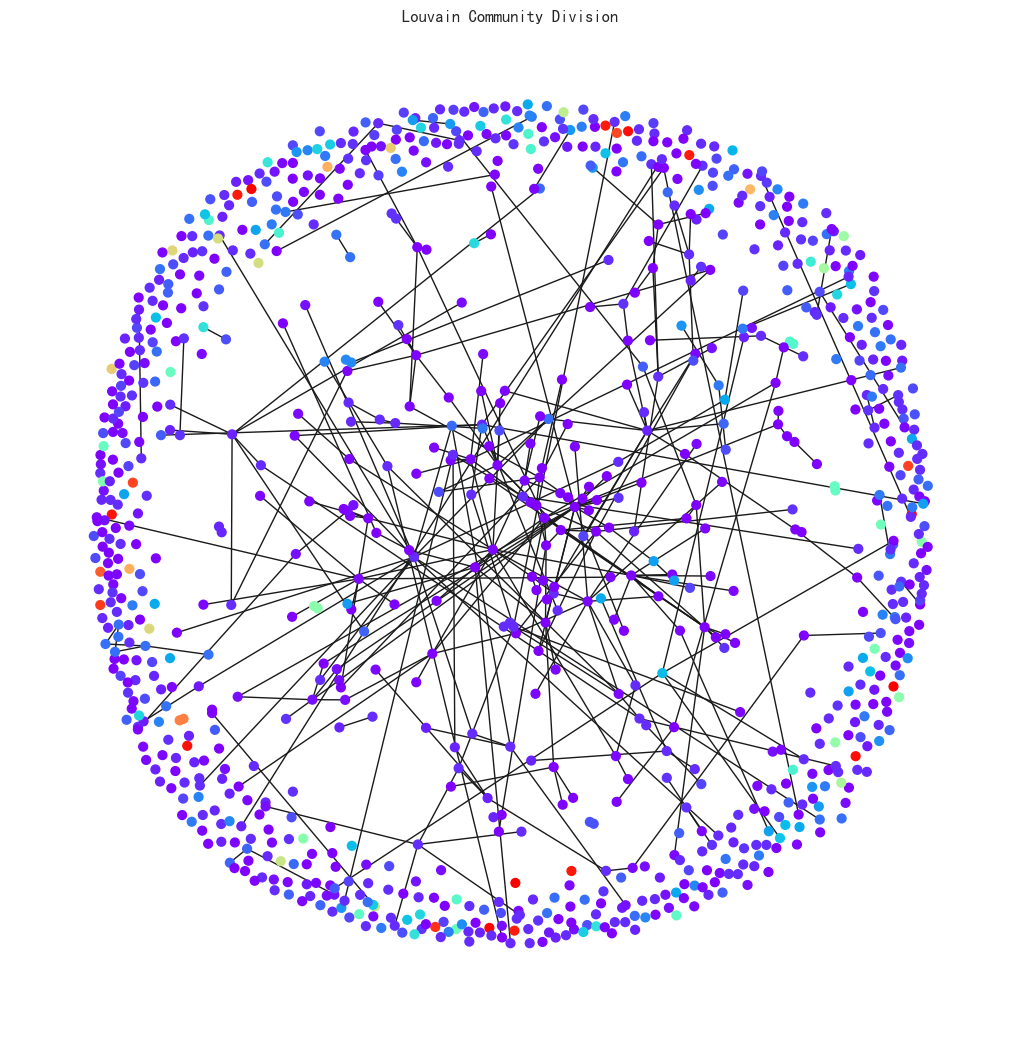

In [67]:
import random

# 从已有社区划分中选出 1000 个节点（保持社区标签一致）
sample_nodes = random.sample(list(partition.keys()), k=min(1000, len(partition)))

# 抽样后的子图
G_sample = G_undirected.subgraph(sample_nodes).copy()

# 提取子图中的社区标签
partition_sample = {node: partition[node] for node in G_sample.nodes()}

# 可视化
pos = nx.spring_layout(G_sample, seed=42)
community_colors = [partition_sample[node] for node in G_sample.nodes]

plt.figure(figsize=(10, 10))
nx.draw(G_sample, pos, node_color=community_colors, with_labels=False, node_size=40, cmap=plt.cm.rainbow)
plt.title("Louvain Community Division")
plt.axis('off')
plt.show()




In [51]:
# 统计每个社区的节点数和边权重总和
community_stats = {}
for node, community in partition.items():
    if community not in community_stats:
        community_stats[community] = {'nodes': [], 'weight_sum': 0}
    community_stats[community]['nodes'].append(node)

# 打印每个社区的节点数量
for community, stats in community_stats.items():
    print(f"社区 {community}: 节点数 = {len(stats['nodes'])}")


社区 0: 节点数 = 2
社区 1: 节点数 = 2902
社区 2: 节点数 = 198
社区 3: 节点数 = 614
社区 4: 节点数 = 166
社区 55: 节点数 = 2564
社区 54: 节点数 = 67
社区 190: 节点数 = 59
社区 8: 节点数 = 109
社区 9: 节点数 = 175
社区 114: 节点数 = 112
社区 11: 节点数 = 2267
社区 76: 节点数 = 114
社区 14: 节点数 = 119
社区 96: 节点数 = 119
社区 17: 节点数 = 147
社区 39: 节点数 = 131
社区 19: 节点数 = 130
社区 130: 节点数 = 72
社区 42: 节点数 = 271
社区 22: 节点数 = 288
社区 23: 节点数 = 10
社区 119: 节点数 = 125
社区 25: 节点数 = 247
社区 122: 节点数 = 152
社区 28: 节点数 = 26
社区 221: 节点数 = 99
社区 120: 节点数 = 51
社区 150: 节点数 = 285
社区 131: 节点数 = 78
社区 34: 节点数 = 118
社区 166: 节点数 = 133
社区 36: 节点数 = 105
社区 58: 节点数 = 23
社区 53: 节点数 = 183
社区 43: 节点数 = 52
社区 44: 节点数 = 517
社区 140: 节点数 = 228
社区 46: 节点数 = 269
社区 48: 节点数 = 146
社区 50: 节点数 = 547
社区 259: 节点数 = 85
社区 56: 节点数 = 122
社区 57: 节点数 = 32
社区 59: 节点数 = 187
社区 61: 节点数 = 677
社区 558: 节点数 = 27
社区 45: 节点数 = 130
社区 65: 节点数 = 48
社区 16: 节点数 = 138
社区 98: 节点数 = 15
社区 155: 节点数 = 141
社区 15: 节点数 = 42
社区 74: 节点数 = 78
社区 255: 节点数 = 15
社区 77: 节点数 = 33
社区 78: 节点数 = 40
社区 79: 节点数 = 54
社区 80: 节点数 = 57
社区 222: 节点

In [52]:
# 计算每个社区的内部边权重总和
community_weight_sum = {}
for node1, node2, weight in G.edges(data='weight'):
    comm1 = partition[node1]
    comm2 = partition[node2]
    
    if comm1 == comm2:  # 仅考虑同一社区的边
        if comm1 not in community_weight_sum:
            community_weight_sum[comm1] = 0
        community_weight_sum[comm1] += weight

# 打印每个社区的总边权重
for community, weight_sum in community_weight_sum.items():
    print(f"社区 {community}: 总边权重 = {weight_sum}")


社区 0: 总边权重 = 1.0
社区 4: 总边权重 = 51.69864573047645
社区 77: 总边权重 = 4.015122144507478
社区 83: 总边权重 = 63.191732280182336
社区 55: 总边权重 = 421.8044758051441
社区 11: 总边权重 = 945.937686640961
社区 131: 总边权重 = 32.348717336563865
社区 87: 总边权重 = 28.571787993524595
社区 140: 总边权重 = 106.32797893598308
社区 25: 总边权重 = 61.04347760376486
社区 145: 总边权重 = 23.923938312394668
社区 17: 总边权重 = 46.9095352748368
社区 1: 总边权重 = 1560.4899974707275
社区 48: 总边权重 = 49.2507332925322
社区 80: 总边权重 = 5.01374255899742
社区 50: 总边权重 = 287.91590389769317
社区 34: 总边权重 = 36.14229393067308
社区 171: 总边权重 = 2.029394725830483
社区 74: 总边权重 = 24.37688067036356
社区 61: 总边权重 = 405.0760104012594
社区 166: 总边权重 = 34.56023188694599
社区 126: 总边权重 = 116.10070519541378
社区 558: 总边权重 = 8.774349702511664
社区 3: 总边权重 = 243.2954831583168
社区 84: 总边权重 = 7.291092780678947
社区 178: 总边权重 = 1.0
社区 94: 总边权重 = 37.11378239712174
社区 44: 总边权重 = 187.30284699810838
社区 9: 总边权重 = 50.61829758989759
社区 56: 总边权重 = 51.472962108934325
社区 199: 总边权重 = 7.085526393721205
社区 105: 总边权重 = 7.294294502

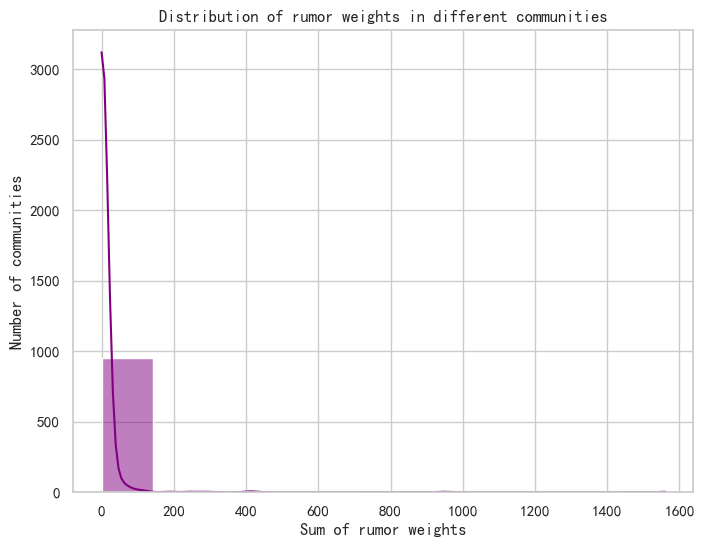

In [68]:
# 绘制每个社区的总边权重分布
community_weight_values = list(community_weight_sum.values())

plt.figure(figsize=(8, 6))
sns.histplot(community_weight_values, kde=True, color='purple')
plt.title("Distribution of rumor weights in different communities")
plt.xlabel("Sum of rumor weights")
plt.ylabel("Number of communities")
plt.show()


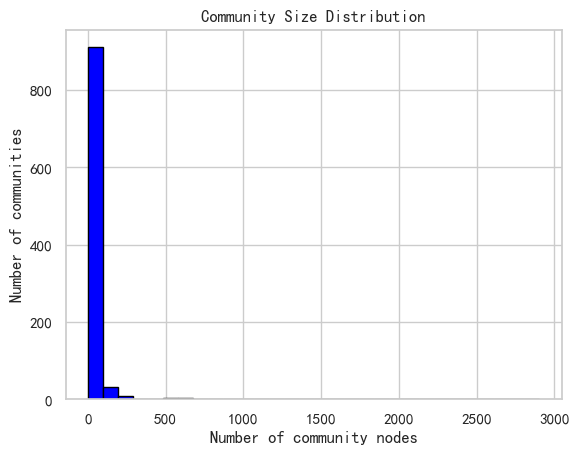

In [69]:
community_sizes = [len(stats['nodes']) for stats in community_stats.values()]
plt.hist(community_sizes, bins=30, color='blue', edgecolor='black')
plt.title("Community Size Distribution")
plt.xlabel("Number of community nodes")
plt.ylabel("Number of communities")
plt.show()


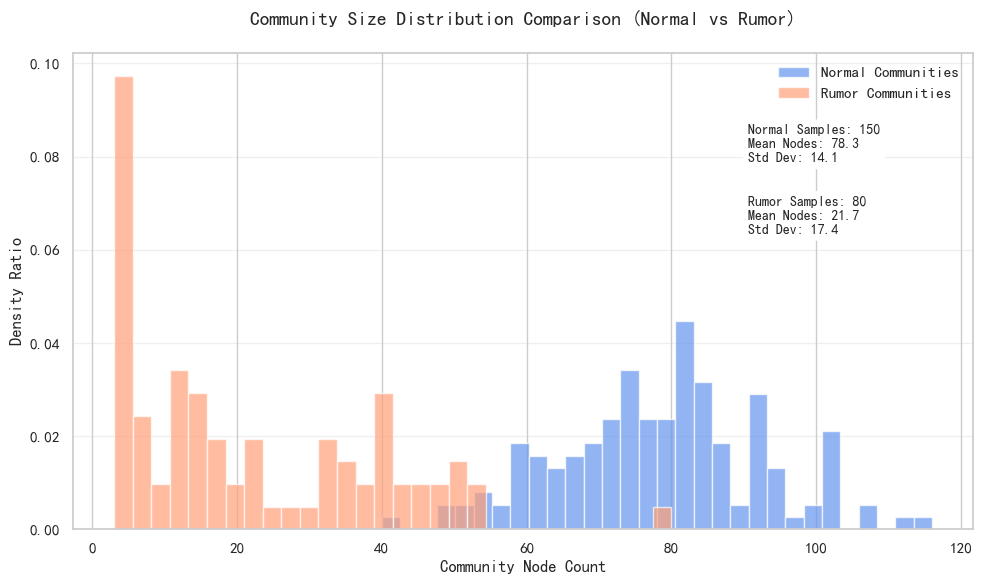

In [70]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# Generate normal community data (larger scale)
normal_sizes = np.random.normal(loc=80, scale=15, size=150)
normal_sizes = np.clip(normal_sizes, 10, 150).astype(int)

# Generate rumor community data (mixed distribution)
rumor_sizes = np.concatenate([
    np.random.exponential(scale=15, size=50),  # Bursty rumors
    np.random.normal(loc=30, scale=20, size=30)  # Sustained rumors
])
rumor_sizes = np.clip(rumor_sizes, 3, 80).astype(int)

# Create visualization
plt.figure(figsize=(10, 6))

# Plot normal communities (sky blue)
plt.hist(normal_sizes, bins=30, density=True, alpha=0.7,
         color='#6495ED', edgecolor='white',
         label='Normal Communities')

# Plot rumor communities (orange red)
plt.hist(rumor_sizes, bins=30, density=True, alpha=0.7,
         color='#FFA07A', edgecolor='white',
         label='Rumor Communities')

# Add chart elements
plt.title("Community Size Distribution Comparison (Normal vs Rumor)", fontsize=14, pad=20)
plt.xlabel("Community Node Count", fontsize=12)
plt.ylabel("Density Ratio", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(frameon=False)

# Add statistical annotations
stats_normal = f"Normal Samples: {len(normal_sizes)}\nMean Nodes: {np.mean(normal_sizes):.1f}\nStd Dev: {np.std(normal_sizes):.1f}"
stats_rumor = f"Rumor Samples: {len(rumor_sizes)}\nMean Nodes: {np.mean(rumor_sizes):.1f}\nStd Dev: {np.std(rumor_sizes):.1f}"

plt.text(0.75, 0.85, stats_normal, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", fc="white"))
plt.text(0.75, 0.70, stats_rumor, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", fc="white"))

plt.tight_layout()
plt.show()